<img src = "./image/image.png" width=100% heigth=200px ><br>
# <center> Employee Attrition </center>

# Introduction<br>
Employee attrition is a critical aspect of human resource management, representing the departure of employees from an organization. Understanding and predicting attrition can aid in strategic workforce planning and retention efforts. This comprehensive documentation outlines the entire process of analyzing employee attrition using a dataset, encompassing data preprocessing, visualization, and the implementation of various machine learning models.

In [4]:
# Importing libraries
import pandas as pd, numpy as np, seaborn as sns, plotly.express as px, matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder



In [5]:
# Plot Customization
plt.figure(figsize = (15,9))
plt.style.context('bmh')

<Figure size 1500x900 with 0 Axes>

Reading Data

In [6]:
# Loading dataset
df = pd.read_csv('data.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Show data set information

In [7]:
print(f'The dataset has {df.shape[0]} rows for each employee and {df.shape[1]} attributes\n')

The dataset has 1470 rows for each employee and 35 attributes



## CLEANING DATA SET

1. Dropped columns with more than 90.0% empty values

In [8]:
# Assuming df is your DataFrame
threshold = 0.8  # Set the threshold for empty values (NaN)

# Calculate the threshold for number of non-NaN values
num_threshold = int((1 - threshold) * len(df))

# Drop columns with more NaN values than the threshold
df_cleaned = df.dropna(axis=1, thresh=num_threshold)

# Print the columns that were dropped
dropped_columns = set(df.columns) - set(df_cleaned.columns)
print(f"Dropped columns with more than {threshold * 100}% empty values: {dropped_columns}")

# Display the shape of the cleaned DataFrame
print("Cleaned DataFrame shape:", df_cleaned.shape)

# df_cleaned now contains the DataFrame with columns having less than the specified threshold of empty values


Dropped columns with more than 80.0% empty values: set()
Cleaned DataFrame shape: (1470, 35)


2. Encode categorical columns

In [9]:
df.dtypes.head()

Age                int64
Attrition         object
BusinessTravel    object
DailyRate          int64
Department        object
dtype: object

*JobLevel* doesn't have a description containing its values, so I'll leave them numeric, just as they've been originally collected.

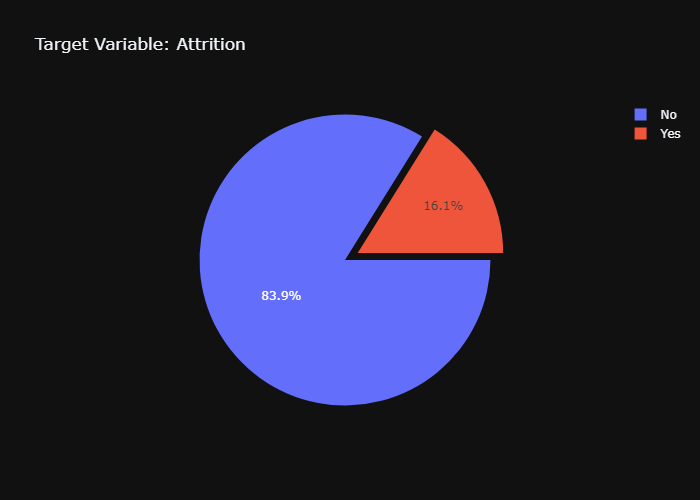

In [10]:
# Visualizing target variable classes and its distribution among the dataset
fig = px.pie(df, names = 'Attrition', title = 'Target Variable: Attrition', template = 'plotly_dark')
fig.update_traces(rotation=90, pull = [0.1], textinfo = "percent",)
fig.show('png')


## Choice Feature
Use two method:
1. feature selection 
2. feature extraction

1. Feature Selection

In [11]:
Attrition = df.query("Attrition == 'Yes'")

In [12]:
#  function to plot histograms
def barplot(i):
    fig = px.histogram(Attrition, x = Attrition[i], template = 'plotly_dark',
                      title = f'{i} x Attrition', text_auto = 'd3-format')
    fig.show('png')

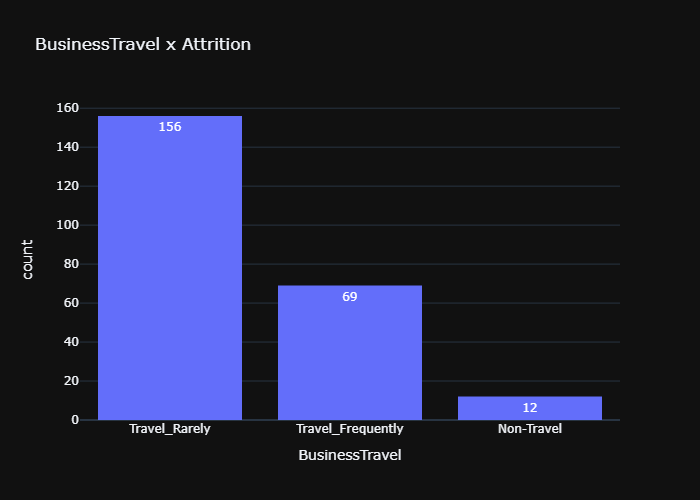

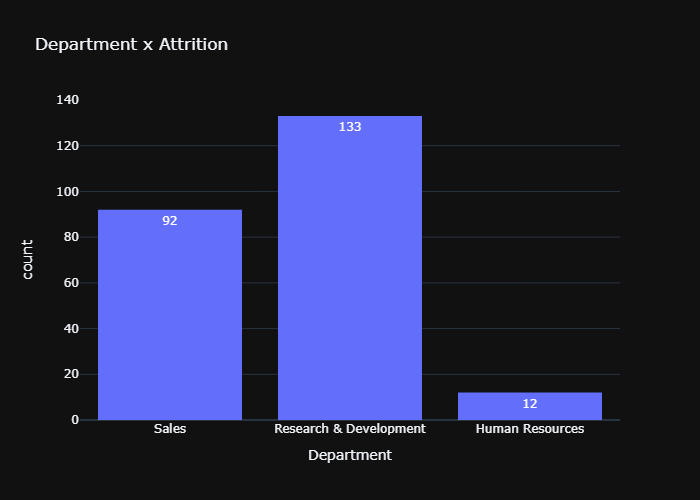

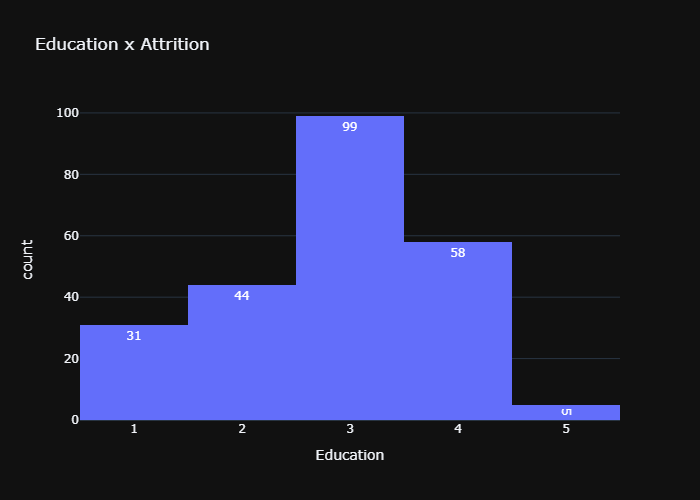

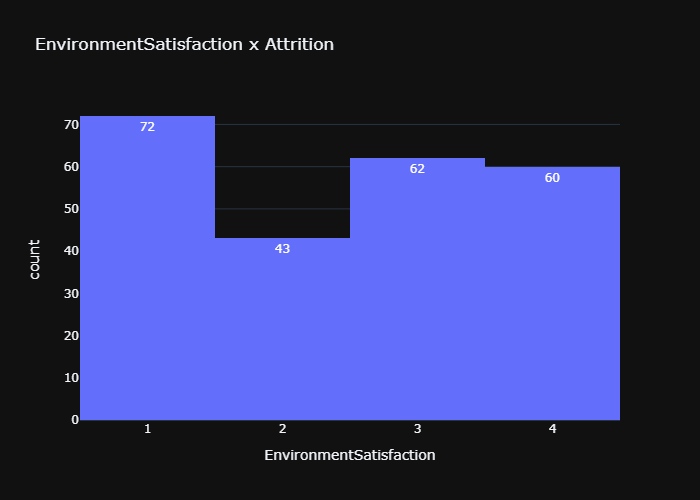

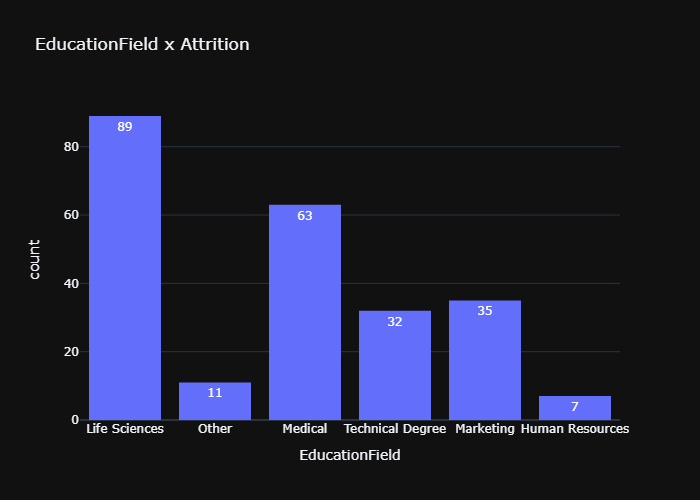

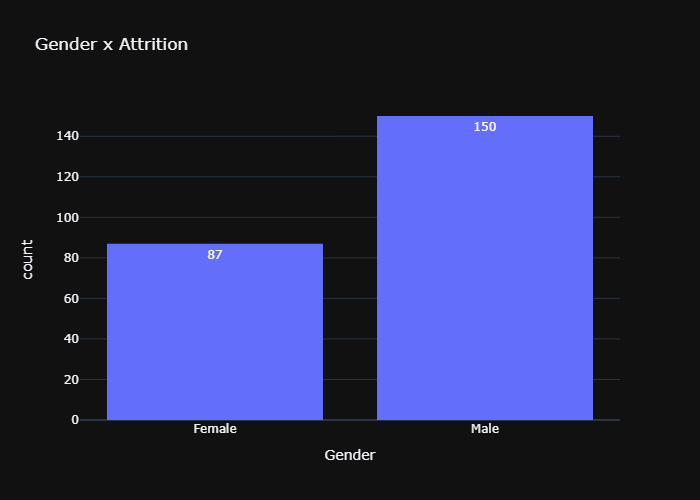

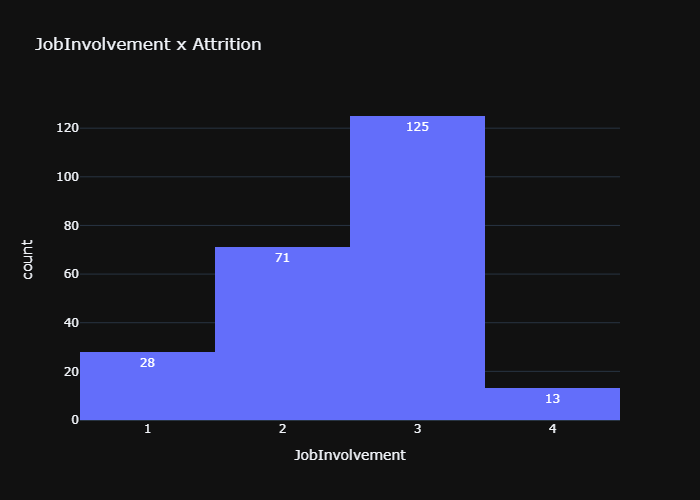

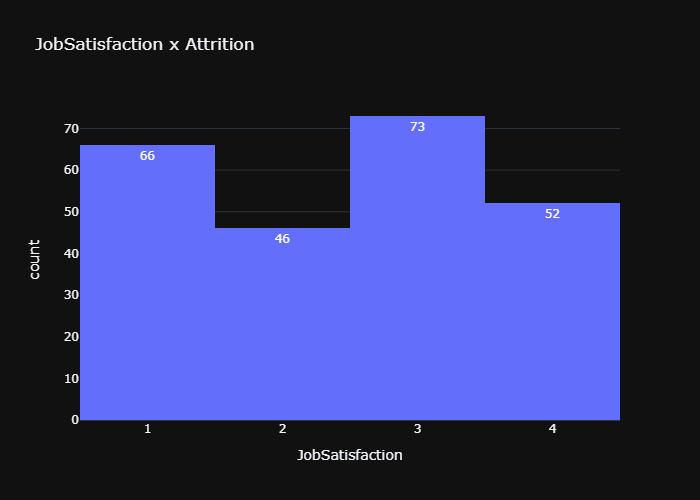

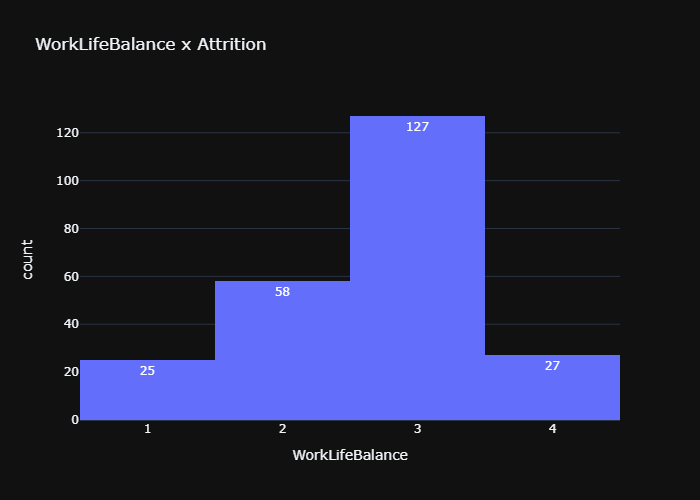

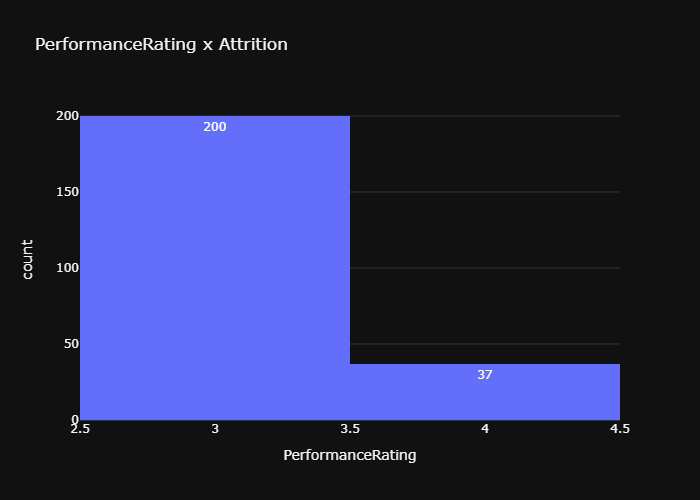

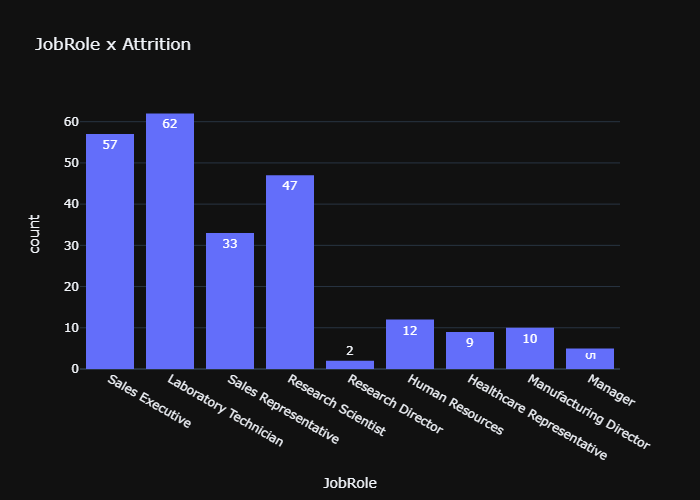

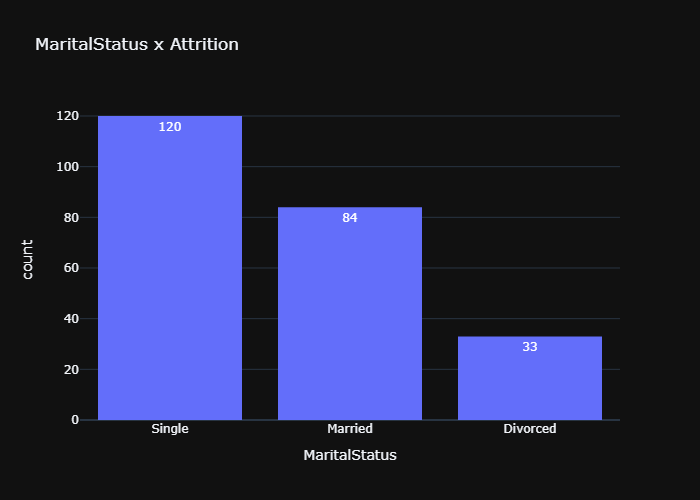

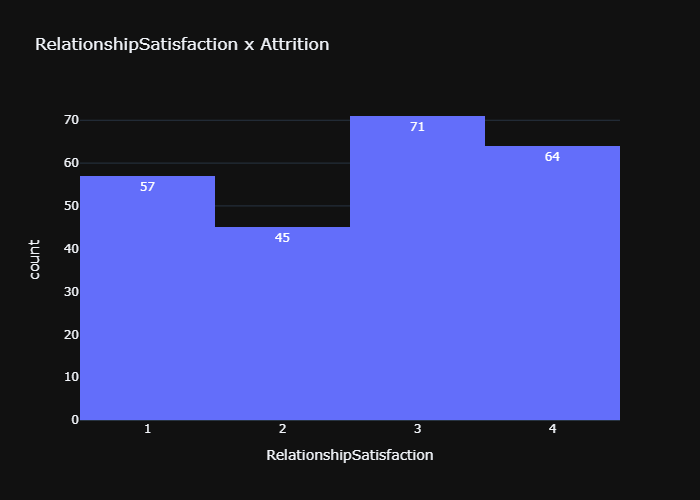

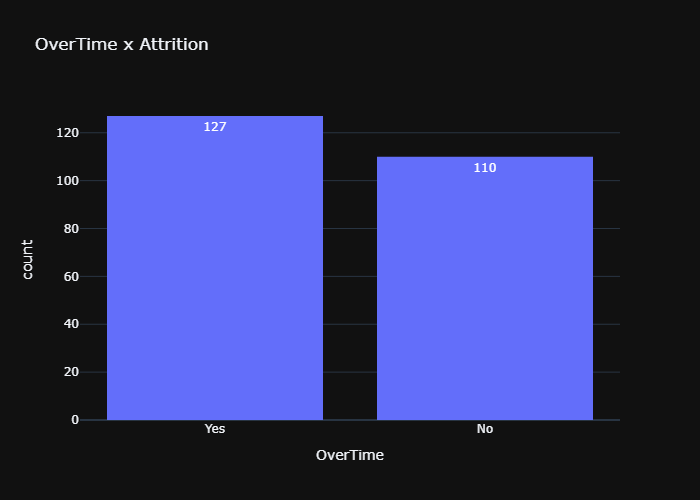

In [13]:
barplot('BusinessTravel')
barplot('Department')
barplot('Education')
barplot('EnvironmentSatisfaction')
barplot('EducationField')
barplot('Gender')
barplot('JobInvolvement')
barplot('JobSatisfaction')
barplot('WorkLifeBalance')
barplot('PerformanceRating')
barplot('JobRole')
barplot('MaritalStatus')
barplot('RelationshipSatisfaction')
barplot('OverTime')

1. Dropped columns with more than 90.0% empty values

In [14]:
# Assuming df is your DataFrame
threshold = 0.8  # Set the threshold for empty values (NaN)

# Calculate the threshold for number of non-NaN values
num_threshold = int((1 - threshold) * len(df))

# Drop columns with more NaN values than the threshold
df_cleaned = df.dropna(axis=1, thresh=num_threshold)

# Print the columns that were dropped
dropped_columns = set(df.columns) - set(df_cleaned.columns)
print(f"Dropped columns with more than {threshold * 100}% empty values: {dropped_columns}")

# Display the shape of the cleaned DataFrame
print("Cleaned DataFrame shape:", df_cleaned.shape)

# df_cleaned now contains the DataFrame with columns having less than the specified threshold of empty values


Dropped columns with more than 80.0% empty values: set()
Cleaned DataFrame shape: (1470, 35)


In [24]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
encoder = LabelEncoder()
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda col: encoder.fit_transform(col.astype(str)))

heatmap chart

<Axes: >

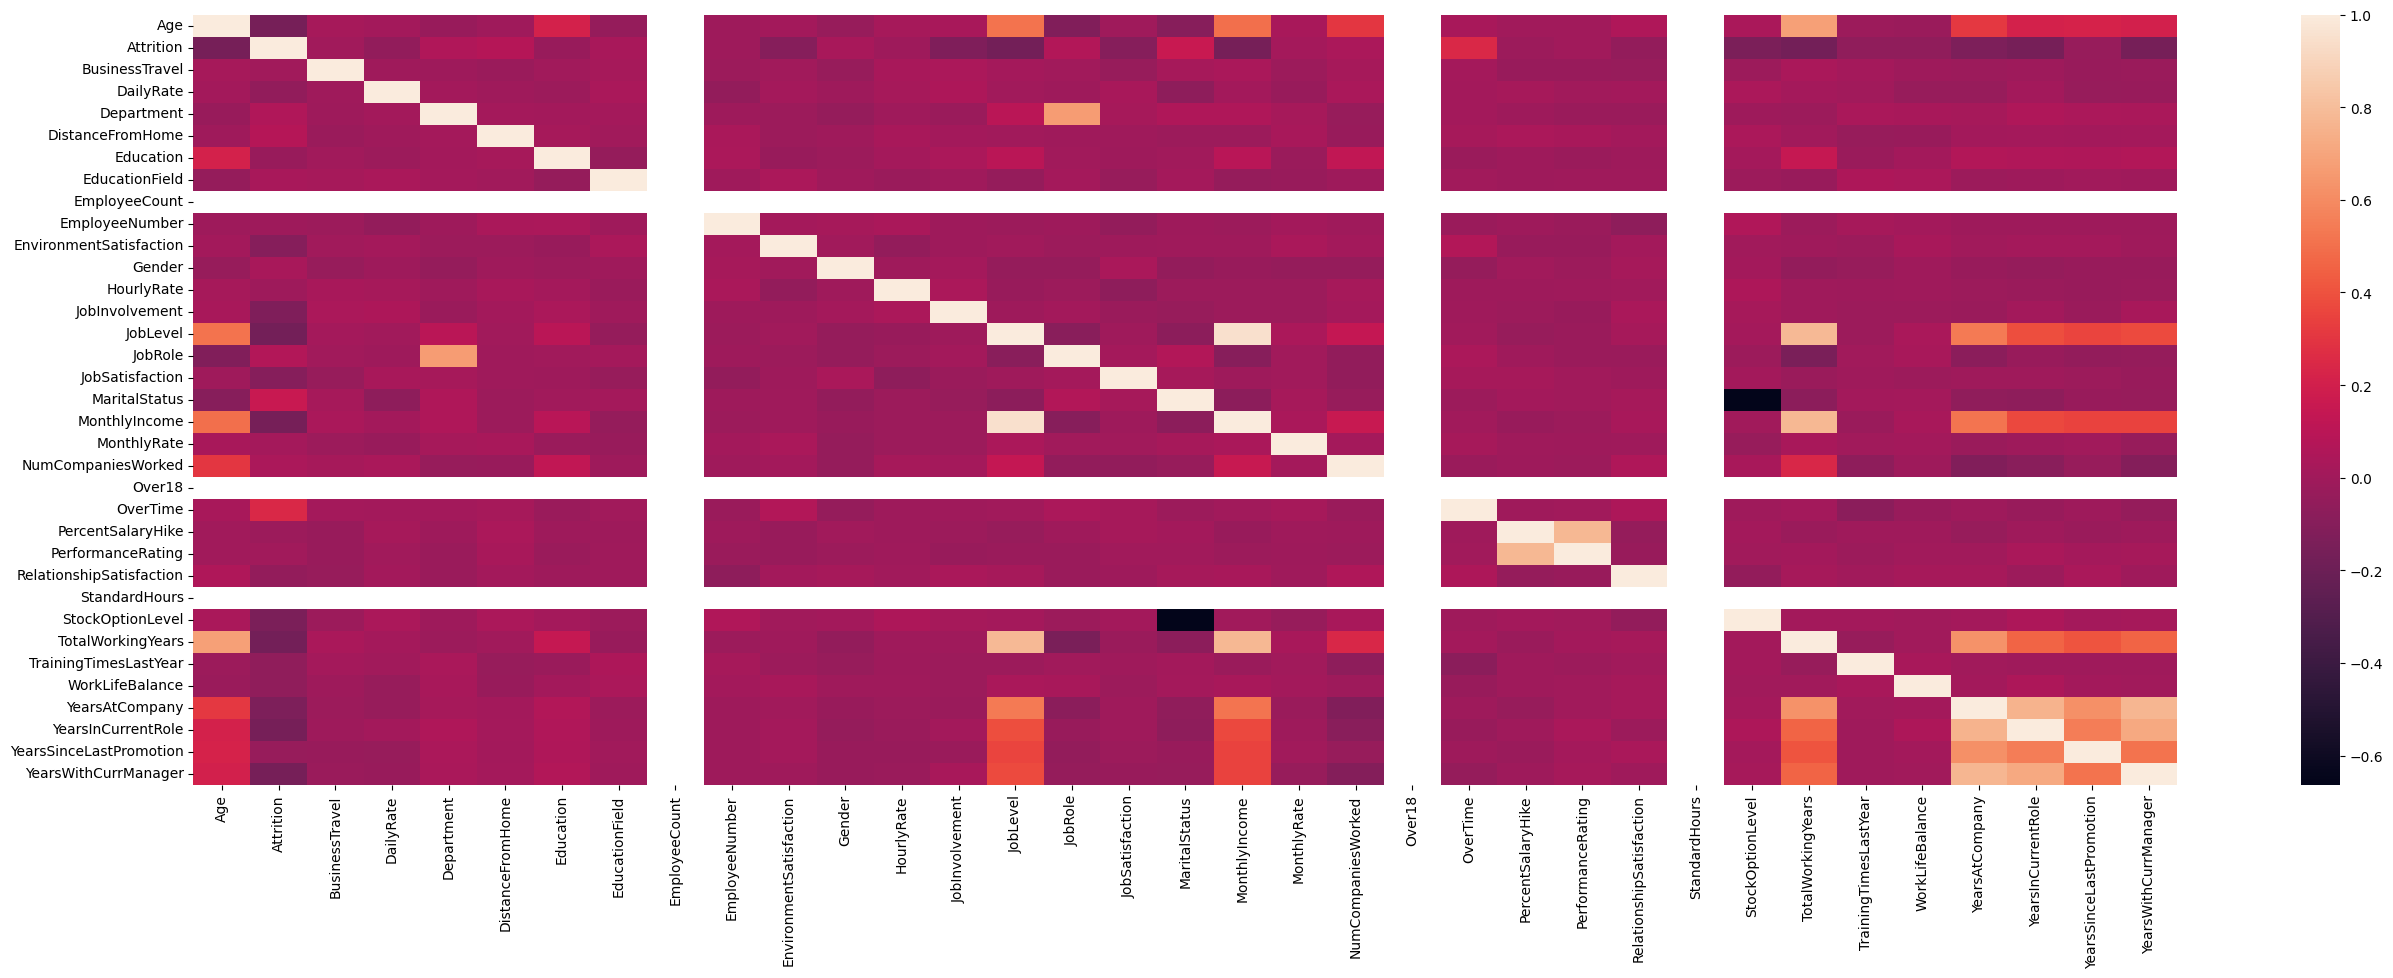

In [25]:
data_correlation = df.corr()

plt.rcParams["figure.figsize"] = [32,10]
sns.heatmap(data_correlation,xticklabels=data_correlation.columns,yticklabels=data_correlation.columns)

<Axes: >

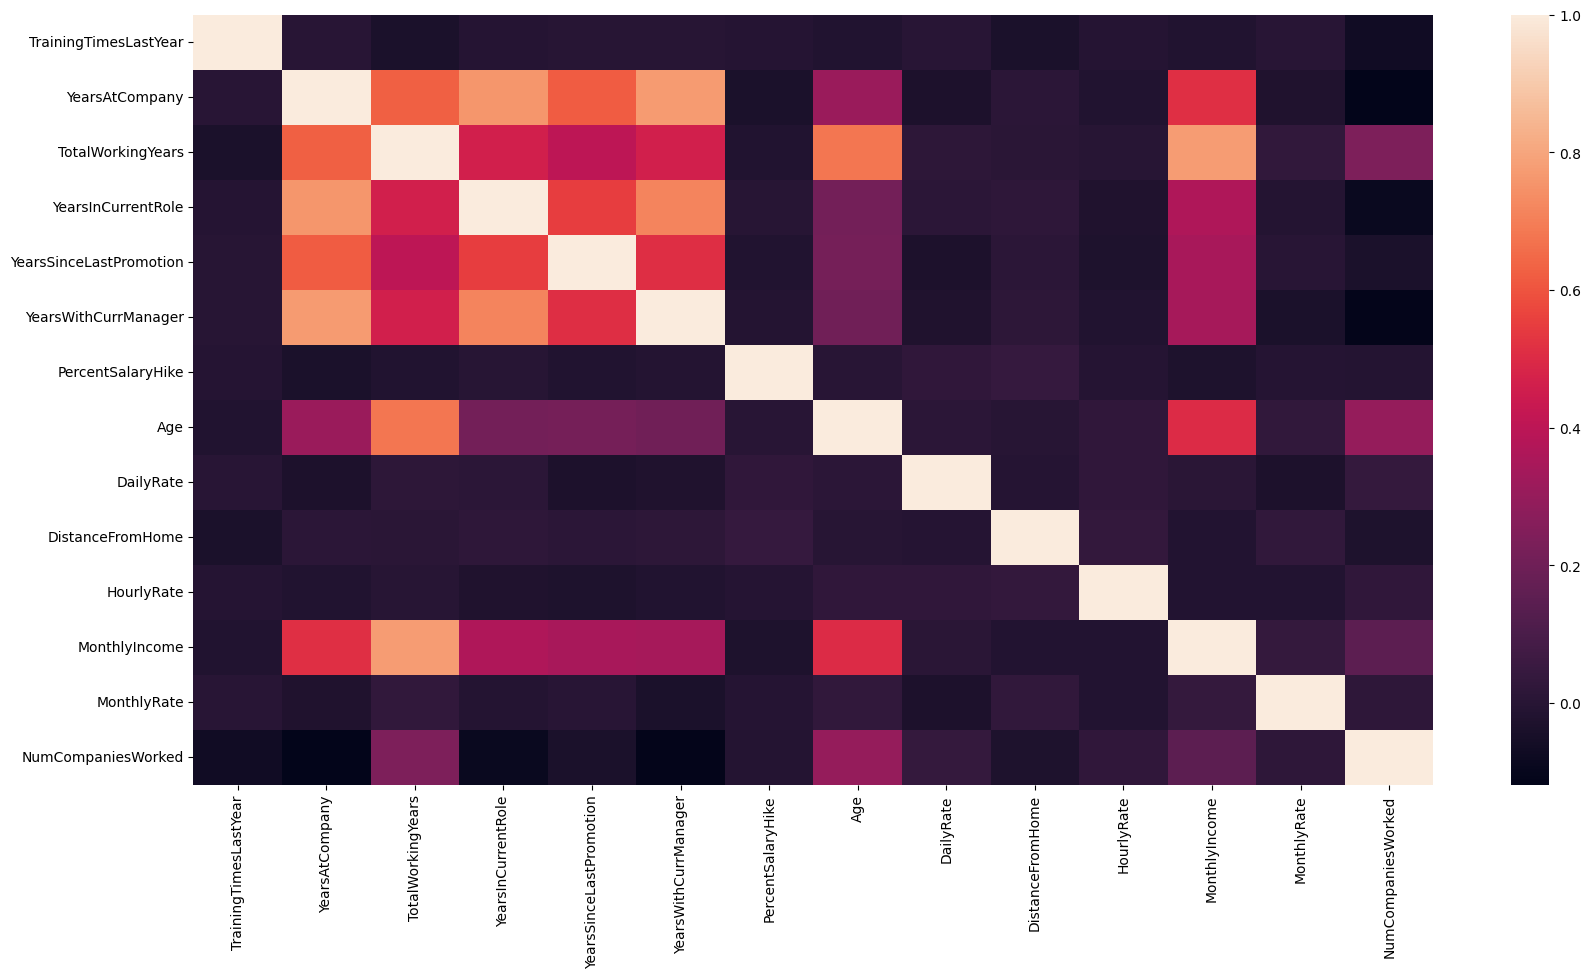

In [26]:
data_corr_filtered = df[ ['TrainingTimesLastYear','YearsAtCompany','TotalWorkingYears',
               'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
               'PercentSalaryHike','Age','DailyRate','DistanceFromHome','HourlyRate',
               'MonthlyIncome','MonthlyRate','NumCompaniesWorked']]
correlation = data_corr_filtered.corr()
plt.rcParams["figure.figsize"] = [20,10]
sns.heatmap(correlation,xticklabels=data_corr_filtered.columns,yticklabels=data_corr_filtered.columns)

Top 10 Features: ['OverTime', 'MonthlyIncome', 'TotalWorkingYears', 'Age', 'YearsAtCompany', 'StockOptionLevel', 'JobLevel', 'YearsWithCurrManager', 'MaritalStatus', 'JobRole']


(11.5, -0.5)

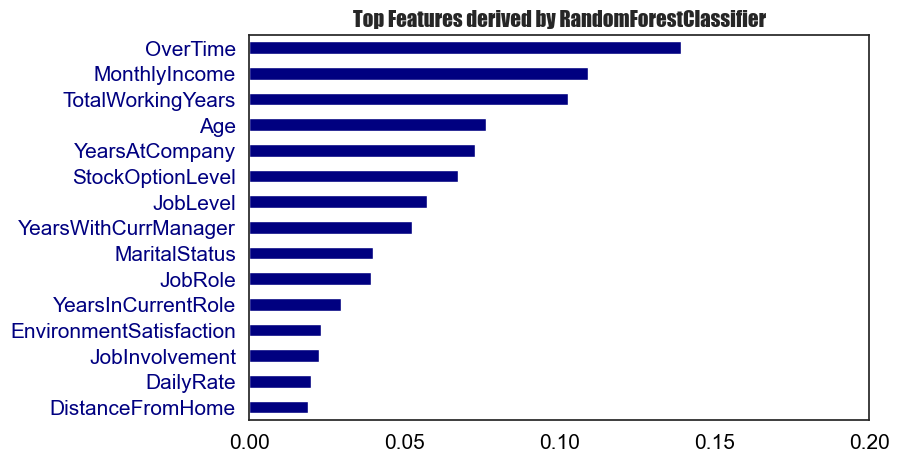

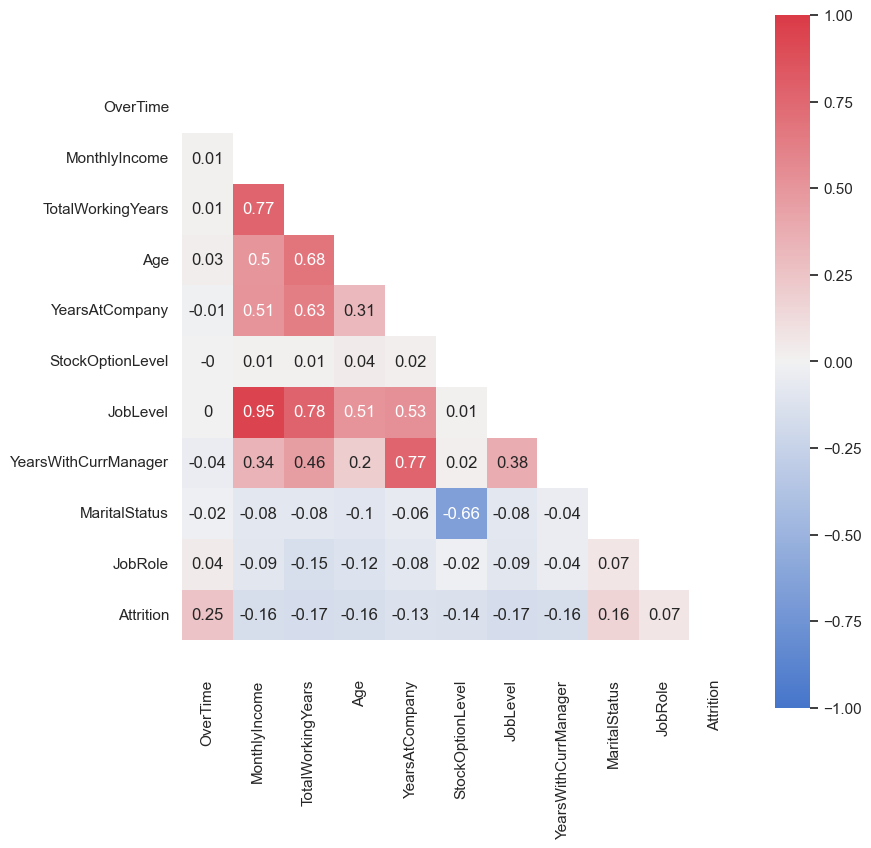

In [29]:
from sklearn.ensemble import RandomForestClassifier

# define feature X and target y dataset (X and y are commonly used in sklearn)
X, y = df.drop('Attrition', axis=1), df['Attrition']

# use RandomForestClassifier to look for important key features
n = 15    # specify n (top n features)
rfc = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=3)
rfc_model = rfc.fit(X, y)
pd.Series(rfc_model.feature_importances_, index=X.columns).nlargest(n).plot(kind='barh', 
    figsize=[8, n/3], color='navy').invert_yaxis()    # most important feature is on top, ie, descending order
ticks_x = np.linspace(0, 0.2, 5)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=15, color='black')
plt.yticks(size=15, color='navy' )
plt.title('Top Features derived by RandomForestClassifier', family='fantasy', size=15)
top10_features = pd.Series(rfc_model.feature_importances_, index=X.columns).nlargest(10)
print('Top 10 Features:', list(top10_features.index))

# check for correlation between top 10 features
X = df.loc[:, top10_features.index]
y = df['Attrition']
df_top10 = X.join(y)
# correlation matrix heatmap visualization
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(df_top10.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(9,9))
# Create a custom color palette
cmap = sns.diverging_palette(255, 10, as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Red=10, Green=128, Blue=255
# Plot the heatmap
sns.heatmap(df_top10.corr().round(2), mask=mask, annot=True, annot_kws={"size": 12}, square=True, 
            cmap=cmap , vmin=-1, vmax=1, ax=ax)  # annot=True display corr label
# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

### EDA Conclusions<br>
#### Categorical Variables<br>
When analyzing categorical variables, we can see that **most employees who have left worked for the Research & Development department**, with most of them being **laboratory technicians, sales executives or research scientists**.<br><br>


It's noticable that **these employees scored excellent performance ratings**. It isn't good to lose employees with such performance levels at all!<br><br>


**Most of them had a Bachelor's degree** and their education field was mostly either **Life Sciences, Medical and Marketing**.<br><br>


These employee majoraly presented high job involvement, and high satisfcation with their job, and also a better work life balance, but it's preoccupying that **a large amount of them said they've had a low satisfaction with the work environment**.<br><br>


How can we make the work environment better? What kind of changes must be done, especially for the research and development personel? These are important questions to be asked.<br><br>

#### Numerical Variables<br>
Looking at the attrition per age histogram, It's noticeable that **as employees grow old, the less they tend to leave**, and most of our employee attrition is made of employees ranging from 25 to 35 years old. The data also shows that **the more working years, more years at the company, and more years in current role employees accumulate, the less likely they are to leave**.<br><br>


When it comes to income, **the majority of employees who have left were among those with the smaller monthly income**, with a monthly income varying from 2.000 to 3.000. Those who've less percent salary hike also tend to leave more than those with a higher percentual hike in salary.<br><br>


So mostly, **employees who leave tend to be young**, with less time working in the company and at the beginning of their career in general, since most of these employees were working for less than 10 years in total.<br><br>


It's also curious to see that a lot of these employees had less than 2 years working with their last manager. This reminds me of the number of employees who said that their satisfaction with the work environment was low. Could we be having issues with some managers? How well are they trained to deal with their teams and the people they led? Are we, as a company doing the best we can to assure a good relationship between managers and teams?

# Employee Attrition Prediction<br>
After looking at our data and identifying some information on employee attrition, it's time to run some classification models to try to predict when employees are more likely to leave.

In [17]:
# Splitting data into train and test sets
# Splitting Dataset
X = df.drop('Attrition', axis = 1)
y = df.Attrition
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
print('X train size: ', len(X_train))
print('X test size: ', len(X_test))
print('y train size: ', len(y_train))
print('y test size: ', len(y_test))

X train size:  1029
X test size:  441
y train size:  1029
y test size:  441


In [18]:
# Rescaling Data
Scaler = MinMaxScaler()
Scaling_Cols = ['TrainingTimesLastYear','YearsAtCompany','TotalWorkingYears',
               'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
               'PercentSalaryHike','Age','DailyRate','DistanceFromHome','HourlyRate',
               'MonthlyIncome','MonthlyRate','NumCompaniesWorked']
X_train[Scaling_Cols] = Scaler.fit_transform(X_train[Scaling_Cols])
X_test[Scaling_Cols] = Scaler.transform(X_test[Scaling_Cols])
X_train


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
745,0.880952,1,0.022923,1,0.607143,4,3,1,1034,3,...,4,80,2,0.425,0.500000,3,0.200,0.388889,0.400000,0.411765
233,0.761905,2,0.537966,2,0.000000,4,3,1,323,4,...,3,80,1,0.800,0.500000,2,0.175,0.000000,0.000000,0.352941
770,0.666667,2,0.234241,1,0.000000,4,3,1,1069,4,...,4,80,2,0.575,0.000000,3,0.050,0.111111,0.133333,0.117647
842,0.238095,2,0.989971,1,0.392857,1,1,1,1175,3,...,4,80,0,0.025,0.666667,2,0.025,0.055556,0.000000,0.000000
915,0.071429,1,0.106017,1,0.321429,2,1,1,1279,1,...,3,80,0,0.050,0.333333,1,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,0.547619,2,0.845272,1,0.142857,5,3,1,1448,2,...,1,80,0,0.175,0.833333,2,0.100,0.111111,0.000000,0.176471
690,0.309524,2,0.367479,1,0.392857,3,3,1,961,4,...,3,80,2,0.250,0.333333,1,0.225,0.388889,0.533333,0.294118
1184,0.857143,2,0.344556,1,0.750000,5,3,1,1665,2,...,3,80,1,0.900,1.000000,3,0.250,0.444444,0.266667,0.411765
1347,0.428571,1,0.795129,0,0.035714,1,0,1,1890,2,...,4,80,0,0.250,0.333333,2,0.250,0.055556,0.000000,0.470588


In [19]:
def show_confu(y_test_pred, model):
    # Create a confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_test_pred) * 100))
    
    # Set zero_division=1 to avoid the warning and consider precision, recall, and F1 as 0 when no predicted samples.
    print('Precision: %.2f%%' % (precision_score(y_test, y_test_pred, zero_division=1) * 100))
    print('Recall: %.2f%%' % (recall_score(y_test, y_test_pred, zero_division=1) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y_test, y_test_pred, zero_division=1) * 100))
    
    confusion_matrix_model = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax=ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])
    plt.show()

Accuracy: 75.28%
Precision: 32.47%
Recall: 30.49%
F1_Score: 31.45%


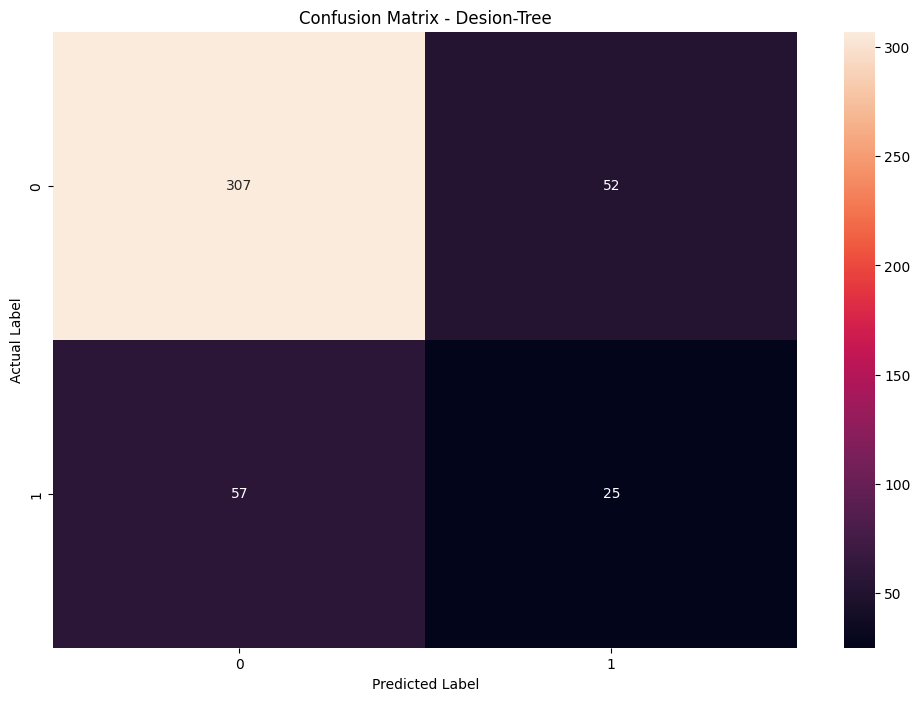

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the decision tree model on the PCA-transformed features
tree_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = tree_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
show_confu(y_pred,'Desion-Tree')

Accuracy: 76.64%
Precision: 11.11%
Recall: 3.66%
F1_Score: 5.50%


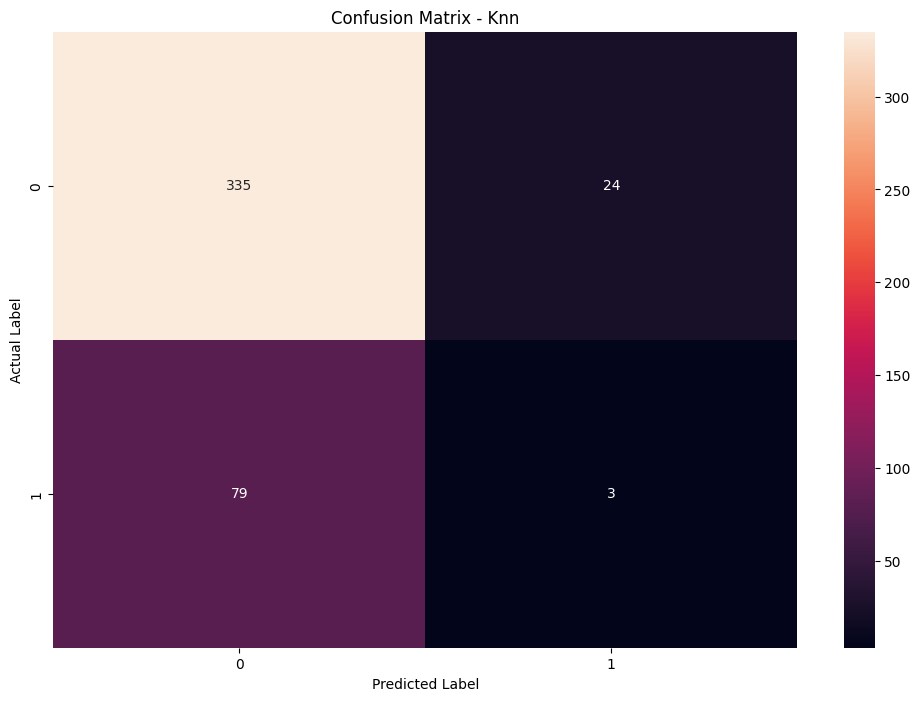

In [21]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the PCA-transformed features
knn_classifier.fit(X_train, y_train)

# Predictions on the test set
y_test_pred = knn_classifier.predict(X_test)

# Evaluate the accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
show_confu(y_test_pred,'Knn')